In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Lecture 11: Logistic Regression

Last update: Feb 20, 2019

Today we will look into another important task in machine learning which is classification. With classification, we want to determine to which (discrete) class a given instance belongs.


Our example for today is eye-state classification from EEG signals. The task to determine the eye state: open or close based on multiple non-invasive brain EEG signals. Since we are classifying instances into two classes, this task is also called **binary classification**.

In [2]:
import scipy.io.arff
(rawdata, metadata) = scipy.io.arff.loadarff('EEG Eye State.arff')

In [3]:
metadata

Dataset: EEG_DATA
	AF3's type is numeric
	F7's type is numeric
	F3's type is numeric
	FC5's type is numeric
	T7's type is numeric
	P7's type is numeric
	O1's type is numeric
	O2's type is numeric
	P8's type is numeric
	T8's type is numeric
	FC6's type is numeric
	F4's type is numeric
	F8's type is numeric
	AF4's type is numeric
	eyeDetection's type is nominal, range is ('0', '1')

Each data column describes EEG reading at a specific location.

<img src="eeg_location.jpg" width="400px">

Let's do some EDA to understand more about data

In [4]:
df = pd.DataFrame(rawdata)
df['eyeDetection'] = df['eyeDetection'].apply(int)

In [5]:
df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [6]:
df.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832,0.448798
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043,0.497388
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000,0.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,0.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,0.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,1.000000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000,1.000000


In [7]:
df.groupby('eyeDetection').mean()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
eyeDetection,,,,,,,,,,,,,,
0,4298.402552,4013.083756,4262.462922,4200.391388,4341.752633,4664.726001,4140.387390,4615.393493,4200.367181,4229.695026,4200.264826,4277.434783,4600.899882,4456.567286
1,4350.798517,4005.694999,4265.937779,4121.413696,4341.726881,4618.594772,4073.570684,4616.871687,4241.497964,4233.307279,4205.149143,4281.441017,4632.774892,4367.147507


In [8]:
df.groupby('eyeDetection').std()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
eyeDetection,,,,,,,,,,,,,,
0,71.727033,54.006143,49.172179,7026.078621,42.109983,3939.432964,6197.052117,35.723325,48.380447,47.996940,35.944185,48.448991,77.430622,7935.067845
1,3719.031369,33.028602,37.710772,26.527445,22.610379,18.992404,34.213632,18.532877,3188.564108,19.742126,39.769668,30.889516,1801.617595,35.723321


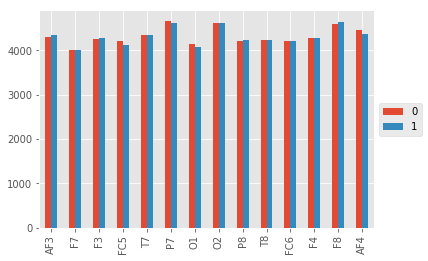

In [9]:
df.groupby('eyeDetection').mean().transpose().plot(kind='bar').legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [10]:
import seaborn as sns

def plot_violin(df, feature_name, threshold=1):
    fig = plt.figure()
    ax = fig.gca()
    print(df.head())
    c = df[feature_name]
    z_c = (c - c.mean()) / c.std()
    outliers = z_c.abs() > threshold
    clean_df = df[~outliers]
    sns.violinplot(data=clean_df, x='eyeDetection', y=feature_name, ax=ax)
    return clean_df

       AF3       F7       F3      FC5       T7       P7       O1       O2  \
0  4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1  4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2  4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3  4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4  4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   

        P8       T8      FC6       F4       F8      AF4  eyeDetection  
0  4222.05  4238.46  4211.28  4280.51  4635.90  4393.85             0  
1  4210.77  4226.67  4207.69  4279.49  4632.82  4384.10             0  
2  4207.69  4222.05  4206.67  4282.05  4628.72  4389.23             0  
3  4217.44  4235.38  4210.77  4287.69  4632.31  4396.41             0  
4  4210.77  4244.10  4212.82  4288.21  4632.82  4398.46             0  
       AF3       F7       F3      FC5       T7       P7       O1       O2  \
0  4329.23  4009.23  4289.23

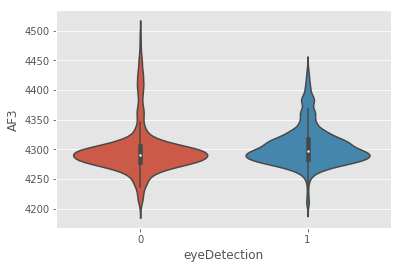

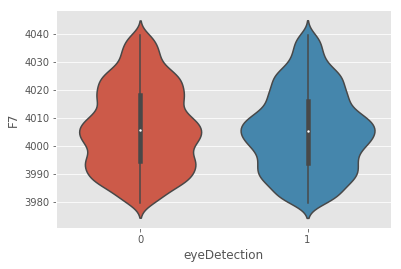

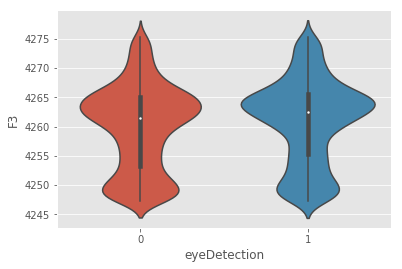

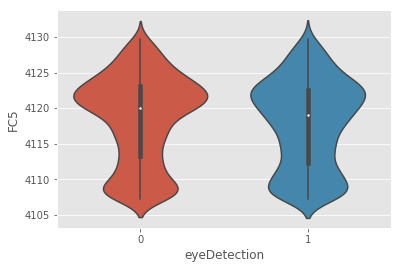

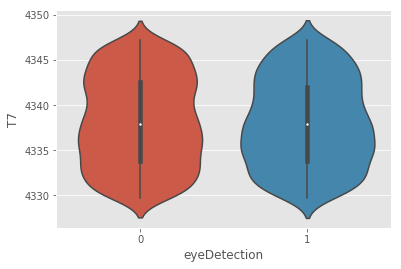

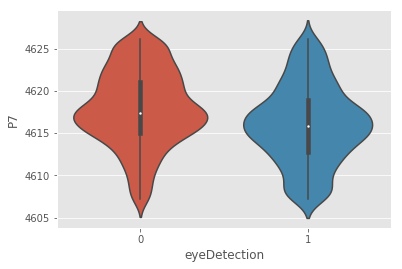

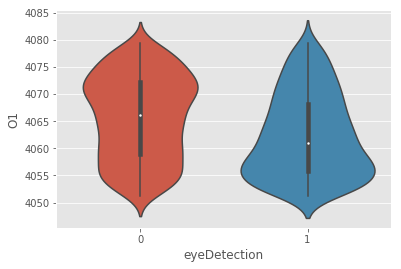

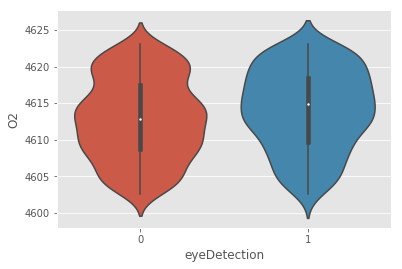

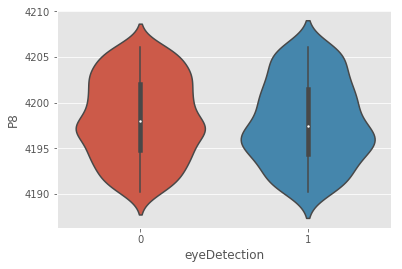

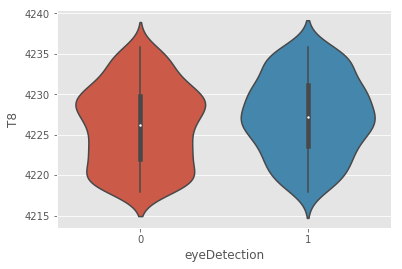

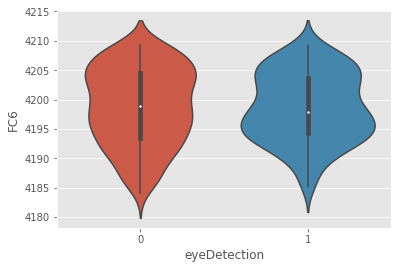

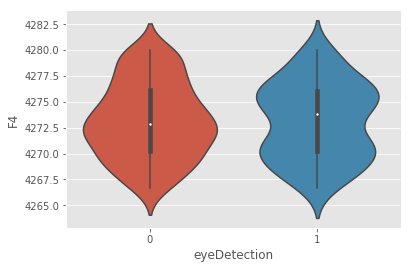

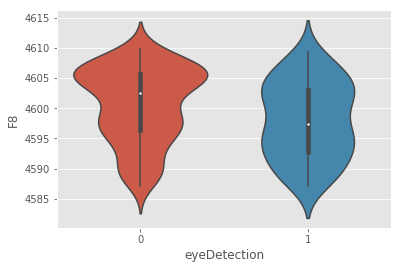

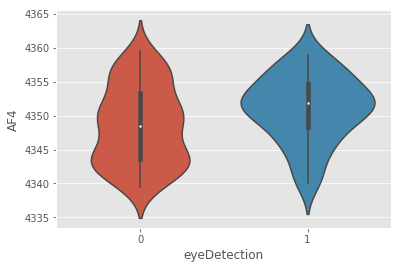

In [11]:
clean_df = df
for col in clean_df.columns[:-1]:
    clean_df = plot_violin(clean_df, col, 1)

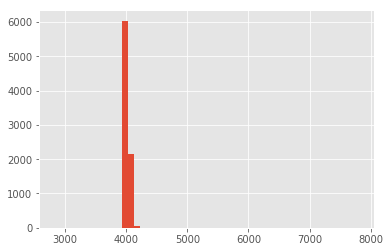

In [12]:
df[df['eyeDetection'] == 0]['F7'].hist(bins=50)

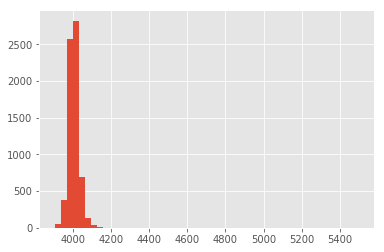

In [13]:
df[df['eyeDetection'] == 1]['F7'].hist(bins=50)

## Centering and scaling


,new_F7,eyeDetection
10386,-25.662925,0
11509,32.448586,1
13179,82.601527,0


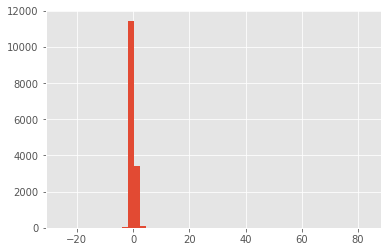

In [14]:
df['new_F7'] = (df['F7'] - df['F7'].mean()) / df['F7'].std()
df['new_F7'].hist(bins=50)
df[['new_F7','eyeDetection']][(df['new_F7'] < -5) | (df['new_F7'] > 5)]

In [15]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,0:14].values
y = df['eyeDetection'].apply(int).values
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

print(X_train.shape)
print(X_test.shape)

(14980, 14)
(14980,)
(10036, 14)
(4944, 14)


## Logistic Regression

The idea here is to apply a linear model to binary classification. In binary classification, we have a sample with some features. Based on the features, we want to know whether it belongs to a binary class or not. The probability that the output is 1 given its input could be represented as:

$$
P(y=1∣x)
$$

If the data samples have $n$ features, and we think we can represent this probability via some linear combination, we could represent this as:

$$
P(y=1∣x)=w_0+w_1 x_1+w_2 x_2+...+w_nx_n
$$

The regression algorithm could fit these weights to the data it sees, however, it would seem hard to map an arbitrary linear combination of inputs, each would may range from $-\infty$ to $\infty$ to a probability value in the range of 0 to 1.

To get around this, we could model instead by using *the log of the odds ratio*.

$$
\log \frac{P(Y=1|x)}{1-P(Y=1|x)} =  w_0+w_1 x_1+w_2 x_2+...+w_nx_n
$$

and, after rearranging, we will have the logistic function:

$$
P(Y=1|x) = \frac{1}{1 + e^{-(w_0+w_1 x_1+w_2 x_2+...+w_nx_n)}}
$$

Read more about this in Chapter 4.4 of Element of Statistical Learning

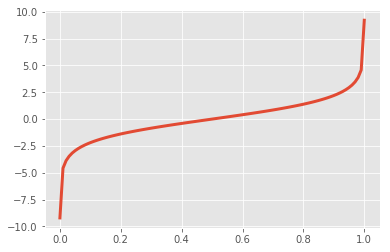

In [16]:
nx = np.linspace(0.0001,0.9999,100)
ny = np.log(nx/(1-nx))
plt.plot(nx,ny,lw=3)

(-0.1, 1.1)

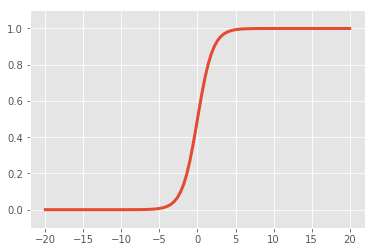

In [17]:
nx = np.linspace(-20,20,100)
ny = 1.0/(1+np.exp(-nx))
plt.plot(nx,ny,lw=3)
plt.ylim([-0.1,1.1])

## How to train a logistic regression model

Logistic regression models are usually fit by maximum likelihood through gradient descent method.

Suppose our training data $D = \{ (X_1,Y_1),(X_2,Y_2),...,(X_m,Y_m)\}$. The likelihood function is given by,
$$
L(D) = \prod_{i=1}^m P(Y_i=1|X_i)^Y_i(1 - P(Y_i=1|X_i))^{(1-Y_i)}
$$
So the log-likelihood is:
$$
\ell(D) = \sum_{i=1}^m Y_i\log P(Y_i=1|X_i) + (1-Y_i)\log(1 - P(Y_i=1|X_i))
$$

During training, we want to find $w_0,w_1,...w_n$ that maximizes $\ell(D)$. However, in practice, we 
$$\min_{\vec{w}} -\ell(D) + \frac{1}{C}f(\vec{w})$$
where $f(\vec{w})$ is called "regularization term" or sometimes "penalization term".


### Parameters:	
- penalty : str, ‘l1’ or ‘l2’, default: ‘l2’

  Used to specify the norm used in the penalization. The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties.


- tol : float, default: 1e-4

  Tolerance for stopping criteria.


- C : float, default: 1.0
  
  Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.


- fit_intercept : bool, default: True

  Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.


- class_weight : dict or ‘balanced’, default: None
  
  Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.


- solver : str, {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default: ‘liblinear’.

  Algorithm to use in the optimization problem.


- max_iter : int, default: 100

  Useful only for the newton-cg, sag and lbfgs solvers. Maximum number of iterations taken for the solvers to converge.


In [18]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(C=100000)

LRmodel.fit(X_train, y_train)

print(LRmodel.coef_)
print(LRmodel.intercept_)

print("Train accuracy", LRmodel.score(X_train,y_train))
print("Test accuracy", LRmodel.score(X_test,y_test))

[[ 0.0063263  -0.01955174  0.01265698 -0.01011739  0.03729545 -0.04055261
   0.00297961  0.00122174  0.00553659  0.00391939 -0.00960428  0.00708225
  -0.00138085  0.00525606]]
[4.0704101e-06]
Train accuracy 0.6448784376245517
Test accuracy 0.6460355987055016


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(C=100000)

# Adding column
newCol = np.log(X_train[:,1] * X_train[:,2])
X_train2 = np.concatenate([X_train, newCol.reshape(-1,1)], axis=1)

newCol_test = np.log(X_test[:,1] * X_test[:,2])
X_test2 = np.concatenate([X_test, newCol_test.reshape(-1,1)], axis=1)

LRmodel.fit(X_train2, y_train)

print(LRmodel.coef_)
print(LRmodel.intercept_)

print("Train accuracy", LRmodel.score(X_train2,y_train))
print("Test accuracy", LRmodel.score(X_test2,y_test))

[[ 6.49908846e-03 -1.97571557e-02  1.26107663e-02 -1.01357133e-02
   3.83941860e-02 -4.11590773e-02  2.64917163e-03  7.24749175e-04
   5.91260029e-03  3.45558567e-03 -9.72198792e-03  7.98711507e-03
  -1.06276568e-03  4.69746302e-03  6.09991759e-05]]
[4.22442331e-06]
Train accuracy 0.6459744918294141
Test accuracy 0.6442152103559871


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Exercise

1. Remove outliers from the training set, retrain and compare results. 
2. Train kNN classifiers and compare results.